# Read DF

In [1]:
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook
from sklearn.linear_model import LogisticRegression
import sklearn.model_selection
import sklearn.preprocessing as preproc
from sklearn.feature_extraction import text
import pickle
import warnings
warnings.filterwarnings("ignore")

In [2]:
labelled_df = pd.read_csv("training_data_usa.csv")
labelled_df.drop(['Unnamed: 0'], axis=1, inplace=True)
labelled_df

,Text,new_text,languages,new_text_after_translation,pos_tagged_words,words_processed_all,words_processed_noun_adj_verb_adv,words_processed_noun,subjectivity,text_type
0,want find way end racism try force people inje...,want find way end racism try force people inje...,ENGLISH,want find way end racism try force people inje...,"[('want', 'JJ'), ('find', 'VB'), ('way', 'NN')...","['want', 'find', 'way', 'end', 'racism', 'try'...","['want', 'find', 'way', 'end', 'racism', 'try'...","['way', 'end', 'racism', 'force', 'people', 'b...",0.200000,subjective
1,"this child almost died tetanus, spent months h...","this child almost died tetanus, spent months h...",ENGLISH,"this child almost died tetanus, spent months h...","[('this', 'DT'), ('child', 'NN'), ('almost', '...","['child', 'almost', 'died', 'tetanus', 'spent'...","['child', 'almost', 'die', 'tetanus', 'spend',...","['child', 'tetanus', 'month', 'hospital', 'cos...",0.100000,subjective
2,juste se rappeler m. leblanc la pression que l...,juste se rappeler m. leblanc la pression que l...,ENGLISH,just remember mr. leblanc the pressure that th...,"[('just', 'RB'), ('remember', 'VB'), ('my', 'P...","['remember', 'leblanc', 'pressure', 'provincia...","['remember', 'leblanc', 'pressure', 'provincia...","['leblanc', 'pressure', 'business', 'world', '...",0.625000,subjective
3,"you would expect cases rise significantly, cou...","you would expect cases rise significantly, cou...",ENGLISH,"you would expect cases rise significantly, cou...","[('you', 'PRP'), ('would', 'MD'), ('expect', '...","['would', 'expect', 'case', 'rise', 'significa...","['would', 'expect', 'case', 'rise', 'significa...","['case', 'vaccination', 'rate', 'play', 'space...",0.459821,subjective
4,depends whether vaccination status is embedded...,depends whether vaccination status is embedded...,ENGLISH,depends whether vaccination status is embedded...,"[('depends', 'VBZ'), ('whether', 'IN'), ('vacc...","['depends', 'whether', 'vaccination', 'status'...","['depend', 'vaccination', 'status', 'embed', '...","['vaccination', 'status', 'code', 'link', 'con...",0.000000,subjective
...,...,...,...,...,...,...,...,...,...,...
1404,"give us two days, we give you headstart hwtc's...","give us two days, we give you headstart hwtc's...",ENGLISH,"give us two days, we give you headstart hwtc's...","[('give', 'VB'), ('us', 'PRP'), ('two', 'CD'),...","['give', 'u', 'two', 'day', 'give', 'headstart...","['give', 'day', 'give', 'headstart', 'hit', 'r...","['day', 'headstart', 'restaurant', 'basic', 'c...",0.500000,objective
1405,"serving as biden‚Äôs top science adviser, eric...","serving as biden‚Äôs top science adviser, eric...",ENGLISH,"serving as biden‚Äôs top science adviser, eric...","[('serving', 'VBG'), ('as', 'IN'), ('biden', '...","['serving', 'biden', 'top', 'science_adviser',...","['serve', 'biden', 'top', 'office', 'science',...","['top', 'office', 'science', 'technology', 'po...",0.360417,objective
1406,please read this letter outlining decepticons‚...,please read this letter outlining decepticons‚...,ENGLISH,please read this letter outlining decepticons‚...,"[('please', 'VB'), ('read', 'VB'), ('this', 'D...","['please', 'read', 'letter', 'outlining', 'dec...","['read', 'letter', 'outline', 'decepticon', 'e...","['letter', 'decepticon', 'expectation', 'insti...",0.000000,objective
1407,get your covid-19 vaccination or booster at ib...,get your covid-19 vaccination or booster at ib...,ENGLISH,get your covid-19 vaccination or booster at ib...,"[('get', 'VB'), ('your', 'PRP$'), ('couid', 'N...","['get', 'couid', 'nineteen', 'vaccination', 'b...","['couid', 'next', 'vaccine', 'vaccine', 'age',...","['couid', 'vaccine', 'vaccine', 'age', 'chance']",0.000000,objective


In [3]:
whole_df = pd.read_csv("usa-v2-preprocessed-overall.csv")
whole_df.drop(['Unnamed: 0'], axis=1, inplace=True)
whole_df

,Text,new_text,languages,new_text_after_translation,pos_tagged_words,words_processed_all,words_processed_noun_adj_verb_adv,words_processed_noun
0,want find way end racism try force people inje...,want find way end racism try force people inje...,ENGLISH,want find way end racism try force people inje...,"[('want', 'JJ'), ('find', 'VB'), ('way', 'NN')...","['want', 'find', 'way', 'end', 'racism', 'try'...","['want', 'find', 'way', 'end', 'racism', 'try'...","['way', 'end', 'racism', 'force', 'people', 'b..."
1,"this child almost died tetanus, spent months h...","this child almost died tetanus, spent months h...",ENGLISH,"this child almost died tetanus, spent months h...","[('this', 'DT'), ('child', 'NN'), ('almost', '...","['child', 'almost', 'died', 'tetanus', 'spent'...","['child', 'almost', 'die', 'tetanus', 'spend',...","['child', 'tetanus', 'month', 'hospital', 'cos..."
2,juste se rappeler m. leblanc la pression que l...,juste se rappeler m. leblanc la pression que l...,FRENCH,just remember mr. leblanc the pressure that th...,"[('just', 'RB'), ('remember', 'VB'), ('my', 'P...","['remember', 'leblanc', 'pressure', 'provincia...","['remember', 'leblanc', 'pressure', 'provincia...","['leblanc', 'pressure', 'business', 'world', '..."
3,"you would expect cases rise significantly, cou...","you would expect cases rise significantly, cou...",ENGLISH,"you would expect cases rise significantly, cou...","[('you', 'PRP'), ('would', 'MD'), ('expect', '...","['would', 'expect', 'case', 'rise', 'significa...","['would', 'expect', 'case', 'rise', 'significa...","['case', 'vaccination', 'rate', 'play', 'space..."
4,depends whether vaccination status is embedded...,depends whether vaccination status is embedded...,ENGLISH,depends whether vaccination status is embedded...,"[('depends', 'VBZ'), ('whether', 'IN'), ('vacc...","['depends', 'whether', 'vaccination', 'status'...","['depend', 'vaccination', 'status', 'embed', '...","['vaccination', 'status', 'code', 'link', 'con..."
...,...,...,...,...,...,...,...,...
404260,"if you are eligible, please pre- register covi...","if you are eligible, please pre- register covi...",ENGLISH,"if you are eligible, please pre- register covi...","[('if', 'IN'), ('you', 'PRP'), ('are', 'VBP'),...","['eligible', 'please', 'pre', 'register', 'cou...","['eligible', 'pre', 'register', 'couid', 'vacc...","['couid', 'vaccination', 'appointment', 'vacci..."
404261,do it others.... 💪🎉💉🤙 #vaccinesaveslives,do it others.... flexed_bicepsparty_poppersyri...,ENGLISH,do it others.... flexed_bicepsparty_poppersyri...,"[('do', 'VB'), ('it', 'PRP'), ('others', 'NNS'...","['others', 'vaccinesaveslives']","['other', 'vaccinesaveslive']","['other', 'vaccinesaveslive']"
404262,#fauciouchie #2 #vaccinated #vaccinesaveslives...,#fauciouchie #2 #vaccinated #vaccinesaveslives...,ENGLISH,#fauciouchie #2 #vaccinated #vaccinesaveslives...,"[('fauciouchie', 'RB'), ('two', 'CD'), ('vacci...","['fauciouchie', 'two', 'vaccinated', 'vaccines...","['vaccinated', 'vaccinesaveslive', 'getyourshot']","['vaccinesaveslive', 'getyourshot']"
404263,yay 🙌🏻 congrats dr. j being fully vaccinated i...,yay raising_handslight_skin_tone congrats dr. ...,ENGLISH,yay raising_handslight_skin_tone congrats dr. ...,"[('yay', 'NN'), ('congrats', 'NNS'), ('do', 'V...","['yay', 'congrats', 'fully', 'vaccinated', 'be...","['congrat', 'fully', 'vaccinate', 'good', 'fee...","['congrat', 'feeling', 'safetyfirst', 'vaccine..."


In [4]:
whole_df.drop(69103, axis=0, inplace=True)

# Logistic Regression

In [5]:
training_data, test_data = sklearn.model_selection.train_test_split(labelled_df, train_size = 0.8, random_state=1)

In [6]:
print(training_data.shape)
print(test_data.shape)

(1127, 10)
(282, 10)


In [7]:
def simple_logistic_classify(X_tr, y_tr, X_test, y_test, description, _C=1.0):
    model = LogisticRegression(C=_C).fit(X_tr, y_tr)
    score = model.score(X_test, y_test)
    print('Test Score with', description, 'features', score)
    return model

In [8]:
y_tr = training_data['text_type']
y_te = test_data['text_type']

In [9]:
param_grid_ = {'C': [1e-5, 1e-3, 1e-1, 1e0, 1e1, 1e2]}

## Train Model

### BoW

In [10]:
bow_converter = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False)
x = bow_converter.fit_transform(whole_df['new_text_after_translation'])

words = bow_converter.get_feature_names()
len(words)

965

In [11]:
bow_transform = CountVectorizer(tokenizer=lambda doc: doc, ngram_range=[3,3], lowercase=False) 

In [12]:
whole_data_bow = bow_transform.fit_transform(whole_df["new_text_after_translation"])

In [13]:
whole_data_bow

<404264x62449 sparse matrix of type '<class 'numpy.int64'>'
	with 49627035 stored elements in Compressed Sparse Row format>

In [14]:
X_tr_bow = bow_transform.transform(training_data['new_text_after_translation'])

In [15]:
X_tr_bow

<1127x62449 sparse matrix of type '<class 'numpy.int64'>'
	with 163033 stored elements in Compressed Sparse Row format>

In [16]:
len(bow_transform.vocabulary_)

62449

In [17]:
X_tr_bow.shape

(1127, 62449)

In [18]:
X_te_bow = bow_transform.transform(test_data['new_text_after_translation'])

In [19]:
X_te_bow

<282x62449 sparse matrix of type '<class 'numpy.int64'>'
	with 39641 stored elements in Compressed Sparse Row format>

In [20]:
model_bow = simple_logistic_classify(X_tr_bow, y_tr, X_te_bow, y_te, 'bow')

Test Score with bow features 0.8581560283687943


In [21]:
bow_search = sklearn.model_selection.GridSearchCV(LogisticRegression(), cv=5, param_grid=param_grid_)

In [22]:
bow_search.fit(X_tr_bow, y_tr)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1e-05, 0.001, 0.1, 1.0, 10.0, 100.0]})

In [23]:
bow_search.best_score_

0.833195673549656

In [24]:
bow_search.best_params_

{'C': 0.1}

In [25]:
bow_search.cv_results_

{'mean_fit_time': array([0.20570045, 0.24273872, 0.39804397, 0.60790639, 0.78392329,
        0.81747522]),
 'std_fit_time': array([0.00514344, 0.0144259 , 0.02636188, 0.03254041, 0.0149318 ,
        0.01208405]),
 'mean_score_time': array([0.00086813, 0.00086966, 0.00085154, 0.00080266, 0.00083642,
        0.00095096]),
 'std_score_time': array([1.00496460e-04, 4.92126442e-05, 7.18591541e-05, 8.01081601e-05,
        9.29709451e-05, 4.56277601e-05]),
 'param_C': masked_array(data=[1e-05, 0.001, 0.1, 1.0, 10.0, 100.0],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1e-05},
  {'C': 0.001},
  {'C': 0.1},
  {'C': 1.0},
  {'C': 10.0},
  {'C': 100.0}],
 'split0_test_score': array([0.74336283, 0.75663717, 0.81858407, 0.79646018, 0.80530973,
        0.79646018]),
 'split1_test_score': array([0.74336283, 0.75221239, 0.83628319, 0.82743363, 0.83628319,
        0.81415929]),
 'split2_test_score': array([0.7466666

In [26]:
model_bow = simple_logistic_classify(X_tr_bow, y_tr, X_te_bow, y_te, 'bow', 
                              _C=bow_search.best_params_['C'])

Test Score with bow features 0.875886524822695


### TF-IDF

In [27]:
tfidf_transform = text.TfidfTransformer(norm=None)
X_tr_tfidf = tfidf_transform.fit_transform(X_tr_bow)

In [28]:
X_tr_tfidf

<1127x62449 sparse matrix of type '<class 'numpy.float64'>'
	with 163033 stored elements in Compressed Sparse Row format>

In [29]:
X_te_tfidf = tfidf_transform.transform(X_te_bow)

In [30]:
X_te_tfidf

<282x62449 sparse matrix of type '<class 'numpy.float64'>'
	with 39641 stored elements in Compressed Sparse Row format>

In [31]:
model_tfidf = simple_logistic_classify(X_tr_tfidf, y_tr, X_te_tfidf, y_te, 'tf-idf')

Test Score with tf-idf features 0.8439716312056738


In [32]:
tfidf_search = sklearn.model_selection.GridSearchCV(LogisticRegression(), cv=5,
                                   param_grid=param_grid_)

In [33]:
tfidf_search.fit(X_tr_tfidf, y_tr)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1e-05, 0.001, 0.1, 1.0, 10.0, 100.0]})

In [34]:
tfidf_search.best_score_

0.8305132743362831

In [35]:
tfidf_search.best_params_

{'C': 1.0}

In [36]:
model_tfidf = simple_logistic_classify(X_tr_tfidf, y_tr, X_te_tfidf, y_te, 'tf-idf', 
                              _C=tfidf_search.best_params_['C'])

Test Score with tf-idf features 0.8439716312056738


### Overall Comparison - BoW vs TF-IDF

In [37]:
results_file = open('tfidf_gridcv_results.pkl', 'wb')
pickle.dump(bow_search, results_file, -1)
pickle.dump(tfidf_search, results_file, -1)
results_file.close()

In [38]:
pkl_file = open('tfidf_gridcv_results.pkl', 'rb')
bow_search = pickle.load(pkl_file)
tfidf_search = pickle.load(pkl_file)
pkl_file.close()

In [39]:
search_results = pd.DataFrame.from_dict({'bow': bow_search.cv_results_['mean_test_score'],
                               'tfidf': tfidf_search.cv_results_['mean_test_score']})
search_results

,bow,tfidf
0,0.743567,0.743567
1,0.752437,0.827878
2,0.833196,0.826962
3,0.827001,0.830513
4,0.822541,0.818973
5,0.810124,0.819870


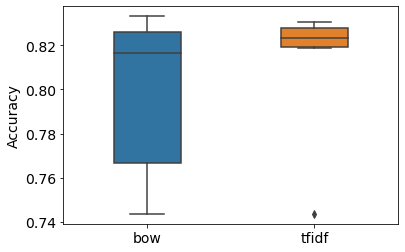

In [40]:
%matplotlib inline
ax = sns.boxplot(data=search_results, width=0.4)
ax.set_ylabel('Accuracy', size=14)
ax.tick_params(labelsize=14)
plt.savefig('tfidf_gridcv_results.png')

## Implement on whole df

In [41]:
whole_data_bow

<404264x62449 sparse matrix of type '<class 'numpy.int64'>'
	with 49627035 stored elements in Compressed Sparse Row format>

In [42]:
whole_tfidf = tfidf_transform.fit_transform(whole_data_bow)

In [43]:
whole_tfidf

<404264x62449 sparse matrix of type '<class 'numpy.float64'>'
	with 49627035 stored elements in Compressed Sparse Row format>

In [44]:
predictions = model_tfidf.predict(whole_tfidf)

In [45]:
predictions

array(['subjective', 'subjective', 'subjective', ..., 'objective',
       'subjective', 'subjective'], dtype=object)

In [46]:
whole_df["text_type"] = predictions

In [47]:
whole_df

,Text,new_text,languages,new_text_after_translation,pos_tagged_words,words_processed_all,words_processed_noun_adj_verb_adv,words_processed_noun,text_type
0,want find way end racism try force people inje...,want find way end racism try force people inje...,ENGLISH,want find way end racism try force people inje...,"[('want', 'JJ'), ('find', 'VB'), ('way', 'NN')...","['want', 'find', 'way', 'end', 'racism', 'try'...","['want', 'find', 'way', 'end', 'racism', 'try'...","['way', 'end', 'racism', 'force', 'people', 'b...",subjective
1,"this child almost died tetanus, spent months h...","this child almost died tetanus, spent months h...",ENGLISH,"this child almost died tetanus, spent months h...","[('this', 'DT'), ('child', 'NN'), ('almost', '...","['child', 'almost', 'died', 'tetanus', 'spent'...","['child', 'almost', 'die', 'tetanus', 'spend',...","['child', 'tetanus', 'month', 'hospital', 'cos...",subjective
2,juste se rappeler m. leblanc la pression que l...,juste se rappeler m. leblanc la pression que l...,FRENCH,just remember mr. leblanc the pressure that th...,"[('just', 'RB'), ('remember', 'VB'), ('my', 'P...","['remember', 'leblanc', 'pressure', 'provincia...","['remember', 'leblanc', 'pressure', 'provincia...","['leblanc', 'pressure', 'business', 'world', '...",subjective
3,"you would expect cases rise significantly, cou...","you would expect cases rise significantly, cou...",ENGLISH,"you would expect cases rise significantly, cou...","[('you', 'PRP'), ('would', 'MD'), ('expect', '...","['would', 'expect', 'case', 'rise', 'significa...","['would', 'expect', 'case', 'rise', 'significa...","['case', 'vaccination', 'rate', 'play', 'space...",subjective
4,depends whether vaccination status is embedded...,depends whether vaccination status is embedded...,ENGLISH,depends whether vaccination status is embedded...,"[('depends', 'VBZ'), ('whether', 'IN'), ('vacc...","['depends', 'whether', 'vaccination', 'status'...","['depend', 'vaccination', 'status', 'embed', '...","['vaccination', 'status', 'code', 'link', 'con...",subjective
...,...,...,...,...,...,...,...,...,...
404260,"if you are eligible, please pre- register covi...","if you are eligible, please pre- register covi...",ENGLISH,"if you are eligible, please pre- register covi...","[('if', 'IN'), ('you', 'PRP'), ('are', 'VBP'),...","['eligible', 'please', 'pre', 'register', 'cou...","['eligible', 'pre', 'register', 'couid', 'vacc...","['couid', 'vaccination', 'appointment', 'vacci...",objective
404261,do it others.... 💪🎉💉🤙 #vaccinesaveslives,do it others.... flexed_bicepsparty_poppersyri...,ENGLISH,do it others.... flexed_bicepsparty_poppersyri...,"[('do', 'VB'), ('it', 'PRP'), ('others', 'NNS'...","['others', 'vaccinesaveslives']","['other', 'vaccinesaveslive']","['other', 'vaccinesaveslive']",subjective
404262,#fauciouchie #2 #vaccinated #vaccinesaveslives...,#fauciouchie #2 #vaccinated #vaccinesaveslives...,ENGLISH,#fauciouchie #2 #vaccinated #vaccinesaveslives...,"[('fauciouchie', 'RB'), ('two', 'CD'), ('vacci...","['fauciouchie', 'two', 'vaccinated', 'vaccines...","['vaccinated', 'vaccinesaveslive', 'getyourshot']","['vaccinesaveslive', 'getyourshot']",objective
404263,yay 🙌🏻 congrats dr. j being fully vaccinated i...,yay raising_handslight_skin_tone congrats dr. ...,ENGLISH,yay raising_handslight_skin_tone congrats dr. ...,"[('yay', 'NN'), ('congrats', 'NNS'), ('do', 'V...","['yay', 'congrats', 'fully', 'vaccinated', 'be...","['congrat', 'fully', 'vaccinate', 'good', 'fee...","['congrat', 'feeling', 'safetyfirst', 'vaccine...",subjective


In [48]:
whole_df["text_type"].value_counts()

subjective    320127
objective      84137
Name: text_type, dtype: int64

In [49]:
whole_df.to_csv("labelled_data_usa_LR.csv")